# Bharat internship task 2 
### Objective - a predictive model to determine the likelihood of survival for passengers on the Titanic.

# Name- Chetan suresh bari

In [67]:
#Importing libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O 
import os
import matplotlib.pyplot as plt#visualization
from PIL import  Image
%matplotlib inline
import pandas as pd
import seaborn as sns #visualization
import itertools
import warnings
warnings.filterwarnings("ignore")
import io
import plotly.offline as py#visualization
py.init_notebook_mode(connected=True)#visualization
import plotly.graph_objs as go#visualization
import plotly.tools as tls#visualization
import plotly.figure_factory as ff#visualization

# 1. Data Importing

In [68]:
import pandas as pd
new = pd.read_csv (r"C:\Users\cheta\OneDrive\Documents\python\Machine learning Practise Projects\Bharat internship task\titanic.csv")

In [ ]:
#first few rows
new.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


# 2. Data Pre-Processing 

1. Data Type and conversion
2. Data Manipulation

#### 2.1. Data Type and conversion

In [70]:
new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     891 non-null    int64  
 1   pclass       891 non-null    int64  
 2   sex          891 non-null    object 
 3   age          714 non-null    float64
 4   sibsp        891 non-null    int64  
 5   parch        891 non-null    int64  
 6   fare         891 non-null    float64
 7   embarked     889 non-null    object 
 8   class        891 non-null    object 
 9   who          891 non-null    object 
 10  adult_male   891 non-null    bool   
 11  deck         203 non-null    object 
 12  embark_town  889 non-null    object 
 13  alive        891 non-null    object 
 14  alone        891 non-null    bool   
dtypes: bool(2), float64(2), int64(4), object(7)
memory usage: 92.4+ KB


#### 2.2. Data Manipulation

In [71]:
new.survived.value_counts()

survived
0    549
1    342
Name: count, dtype: int64

In [72]:
new.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


# 3. Missing Value Identify & Treatment

In [73]:
# count the number of NaN values in each column
print(new.isnull().sum())

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64


In [74]:
new.age.fillna(new.age.mean(),inplace=True) # one column at a time bb

In [75]:
new.embarked.fillna(new.embarked.mode(),inplace=True)

In [76]:
new.embark_town.fillna(new.embark_town.mode(),inplace=True)

In [77]:
# count the number of NaN values in each column
print(new.isnull().sum())

survived         0
pclass           0
sex              0
age              0
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64


# 4.Outlier identify & Treatment 

In [78]:
new.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')

<Axes: ylabel='survived'>

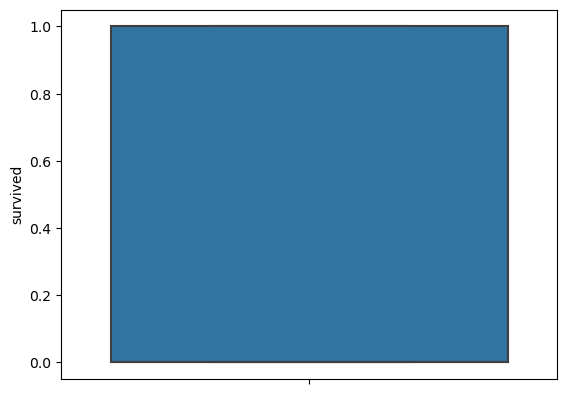

In [79]:
sns.boxplot(y=new.survived)  # Single Variable

<Axes: ylabel='age'>

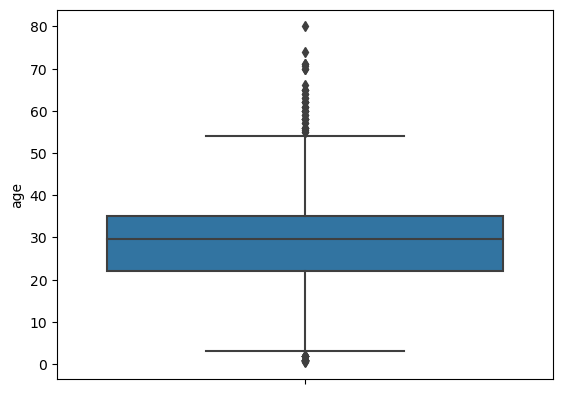

In [80]:
sns.boxplot(y=new.age)  # Single Variable

<Axes: ylabel='fare'>

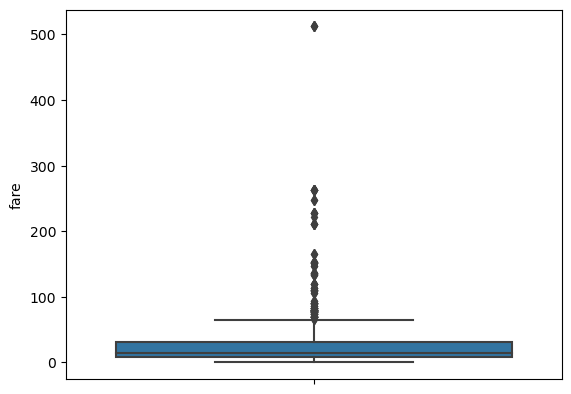

In [81]:
sns.boxplot(y=new.fare)  # Single Variable

# 5. Data Visualization

In [82]:
import plotly.express as px

fig = px.pie(new,names='survived',color='survived',
             color_discrete_map={'Yes':'red',
                                 'No':'green'})
fig.show()

# 6. Labeling the data 

In [83]:
new.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [84]:
new=new.drop('deck',axis=1)

In [85]:
new.select_dtypes(include=[np.number]).columns.tolist()

['survived', 'pclass', 'age', 'sibsp', 'parch', 'fare']

In [86]:
# #Employee Numeric columns
new_num = new[new.select_dtypes(include=[np.number]).columns.tolist()]
new_num.head(3)

,survived,pclass,age,sibsp,parch,fare
0,0,3,22.0,1,0,7.2500
1,1,1,38.0,1,0,71.2833
2,1,3,26.0,0,0,7.9250


In [87]:
new_dummies = new[new.select_dtypes(include=['object']).columns.tolist()]
new_dummies.head(3)

,sex,embarked,class,who,embark_town,alive
0,male,S,Third,man,Southampton,no
1,female,C,First,woman,Cherbourg,yes
2,female,S,Third,woman,Southampton,yes


In [88]:
from sklearn.preprocessing import LabelEncoder
new_dummies=new_dummies.apply(LabelEncoder().fit_transform)
new_dummies.head(3)
# label in ascending order

,sex,embarked,class,who,embark_town,alive
0,1,2,2,1,2,0
1,0,0,0,2,0,1
2,0,2,2,2,2,1


In [89]:
new = pd.concat([new_num, new_dummies],axis=1)
new.head()

,survived,pclass,age,sibsp,parch,fare,sex,embarked,class,who,embark_town,alive
0,0,3,22.0,1,0,7.2500,1,2,2,1,2,0
1,1,1,38.0,1,0,71.2833,0,0,0,2,0,1
2,1,3,26.0,0,0,7.9250,0,2,2,2,2,1
3,1,1,35.0,1,0,53.1000,0,2,0,2,2,1
4,0,3,35.0,0,0,8.0500,1,2,2,1,2,0


# 7. Data Partition 

In [90]:
from sklearn.model_selection import train_test_split

# define our input variable (X) & output variable
X = new.drop('survived', axis = 1)
Y = new[['survived']]
# Split X and y into X_
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=1234)

In [91]:
X_train.shape

(623, 11)

In [92]:
?RandomForestClassifier

In [93]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier

# by default 100 tree will be form 
Model = RandomForestClassifier(n_estimators=20, # make 20 tress
                               criterion="gini",
                               max_depth=4,  # each tree will have 4 branches
                               min_samples_split=100,# each tree will have parent node
                               min_samples_leaf=50,# each tree will have Child node
                               max_features="sqrt")# n_estimators means number tree we want  

Model.fit(X_train, y_train)

RandomForestClassifier(max_depth=4, min_samples_leaf=50, min_samples_split=100,
                       n_estimators=20)

# 8. Random Forest Visualization

In [96]:
# Import tools needed for visualization
from sklearn.tree import export_graphviz
import pydot

In [97]:
list(X.columns)

['pclass',
 'age',
 'sibsp',
 'parch',
 'fare',
 'sex',
 'embarked',
 'class',
 'who',
 'embark_town',
 'alive']

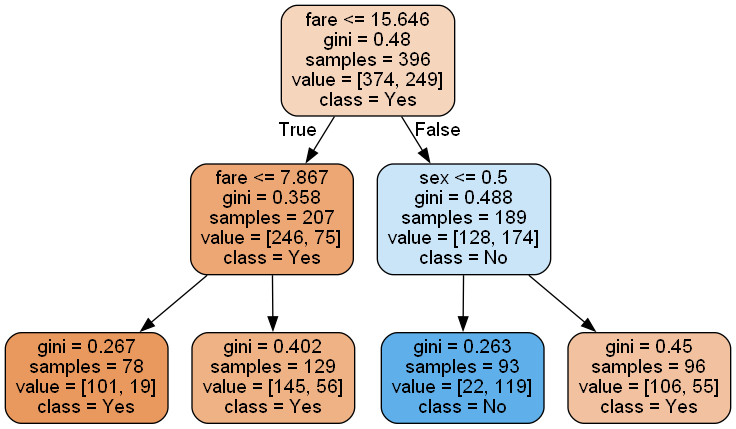

In [98]:
tree = Model.estimators_[19]  # specify the tree number   
survived=['Yes','No'] 
feature_list = list(X.columns)  # all independent variable name

export_graphviz(tree, out_file = 'abc.dot', 
                feature_names = feature_list, 
                leaves_parallel=True,
                class_names=survived,
                rounded = True, 
                filled=True)
# Use dot file to create a graph
(graph,)= pydot.graph_from_dot_file('abc.dot')
# Write graph to a png file
graph.write_png('tree.png')
from IPython.display import Image
Image(filename = 'tree.png')

# 9. Predictions on Train Dataset

In [99]:
train=pd.concat([X_train,y_train],axis=1)
train.head()

,pclass,age,sibsp,parch,fare,sex,embarked,class,who,embark_town,alive,survived
28,3,29.699118,0,0,7.8792,0,1,2,2,1,1,1
270,1,29.699118,0,0,31.0000,1,2,0,1,2,0,0
744,3,31.000000,0,0,7.9250,1,2,2,1,2,1,1
73,3,26.000000,1,0,14.4542,1,0,2,1,0,0,0
423,3,28.000000,1,1,14.4000,0,2,2,2,2,0,0


In [100]:
train['Predicted']=Model.predict(X_train)
train.head()

,pclass,age,sibsp,parch,fare,sex,embarked,class,who,embark_town,alive,survived,Predicted
28,3,29.699118,0,0,7.8792,0,1,2,2,1,1,1,1
270,1,29.699118,0,0,31.0000,1,2,0,1,2,0,0,0
744,3,31.000000,0,0,7.9250,1,2,2,1,2,1,1,1
73,3,26.000000,1,0,14.4542,1,0,2,1,0,0,0,0
423,3,28.000000,1,1,14.4000,0,2,2,2,2,0,0,0


# 10. Model Performance Metrics

In [101]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(train['survived'], train['Predicted'])
print(confusion_matrix)

[[377   6]
 [  0 240]]


In [102]:
from sklearn.metrics import classification_report
print(classification_report(train['survived'], train['Predicted']))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99       383
           1       0.98      1.00      0.99       240

    accuracy                           0.99       623
   macro avg       0.99      0.99      0.99       623
weighted avg       0.99      0.99      0.99       623



# 11. Predictions on Test Dataset

In [103]:
test=pd.concat([X_test,y_test],axis=1)
test.head()

,pclass,age,sibsp,parch,fare,sex,embarked,class,who,embark_town,alive,survived
523,1,44.000000,0,1,57.9792,0,0,0,2,0,1,1
778,3,29.699118,0,0,7.7375,1,1,2,1,1,0,0
760,3,29.699118,0,0,14.5000,1,2,2,1,2,0,0
496,1,54.000000,1,0,78.2667,0,0,0,2,0,1,1
583,1,36.000000,0,0,40.1250,1,0,0,1,0,0,0


In [104]:
test['Predicted']=Model.predict(X_test)
test.head()

,pclass,age,sibsp,parch,fare,sex,embarked,class,who,embark_town,alive,survived,Predicted
523,1,44.000000,0,1,57.9792,0,0,0,2,0,1,1,1
778,3,29.699118,0,0,7.7375,1,1,2,1,1,0,0,0
760,3,29.699118,0,0,14.5000,1,2,2,1,2,0,0,0
496,1,54.000000,1,0,78.2667,0,0,0,2,0,1,1,1
583,1,36.000000,0,0,40.1250,1,0,0,1,0,0,0,0


# 12. Model Performance Metrics on Test data 

In [105]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(test['Predicted'],test['survived'])
print(confusion_matrix)

[[164   0]
 [  2 102]]


In [106]:
from sklearn.metrics import classification_report
print(classification_report(test['survived'], test['Predicted']))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99       166
           1       0.98      1.00      0.99       102

    accuracy                           0.99       268
   macro avg       0.99      0.99      0.99       268
weighted avg       0.99      0.99      0.99       268



# 13. Importance Features

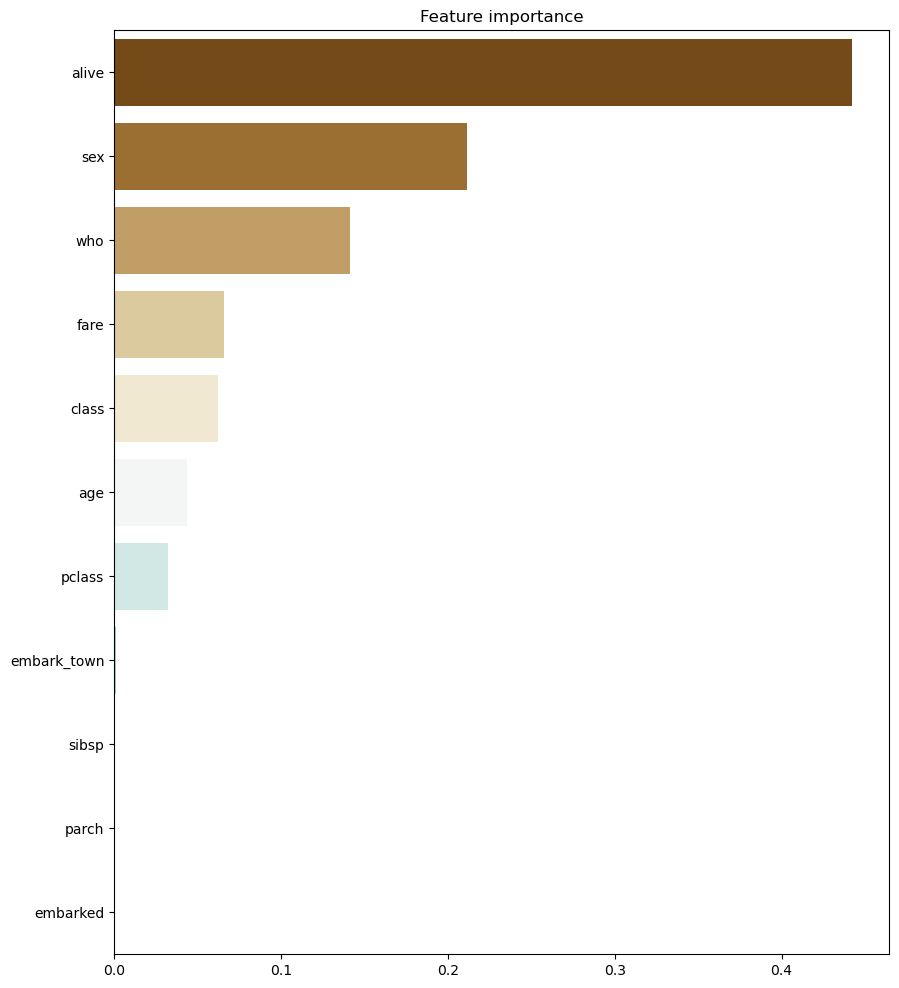

In [108]:
# Plot features importances
imp = pd.Series(data=Model.feature_importances_, index=Model.feature_names_in_).sort_values(ascending=False)
plt.figure(figsize=(10,12))
plt.title("Feature importance")
ax = sns.barplot(y=imp.index, x=imp.values, palette="BrBG", orient='h')

# Finish